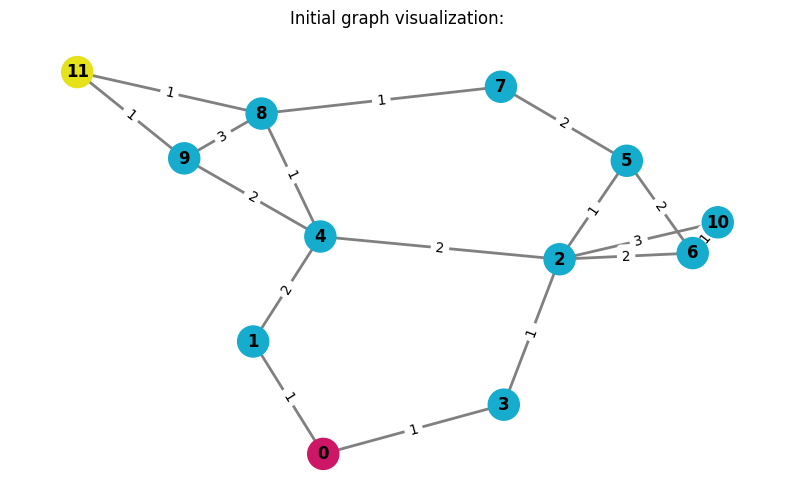

Episode 1/300
Starting state: 0
  Current state: 0 -> Next state: 1
    Edge weight (distance): 1  Reward: -1
    Updated Q-table: -0.1000
  Current state: 1 -> Next state: 0
    Edge weight (distance): 1  Reward: -1
    Updated Q-table: -0.1000
  Current state: 0 -> Next state: 3
    Edge weight (distance): 1  Reward: -1
    Updated Q-table: -0.1000
  Current state: 3 -> Next state: 0
    Edge weight (distance): 1  Reward: -1
    Updated Q-table: -0.1080
  Current state: 0 -> Next state: 1
    Edge weight (distance): 1  Reward: -1
    Updated Q-table: -0.1900
  Current state: 1 -> Next state: 4
    Edge weight (distance): 2  Reward: -2
    Updated Q-table: -0.2000
  Current state: 4 -> Next state: 1
    Edge weight (distance): 2  Reward: -2
    Updated Q-table: -0.2080
  Current state: 1 -> Next state: 0
    Edge weight (distance): 1  Reward: -1
    Updated Q-table: -0.1980
  Current state: 0 -> Next state: 3
    Edge weight (distance): 1  Reward: -1
    Updated Q-table: -0.1900
  Cur

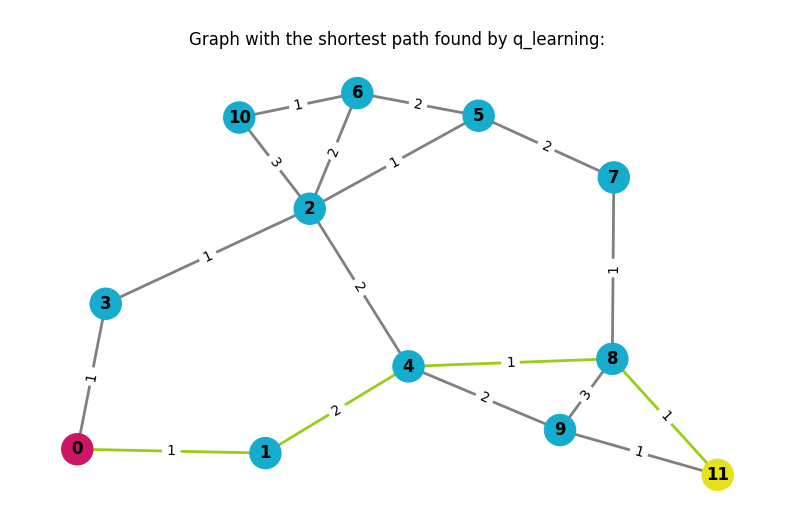

In [57]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

# Set seeds for reproducibility
random.seed(0)
np.random.seed(1)

# PathFinder class: Contains methods for Q-learning, SARSA, and SARSA(λ) to find the optimal path in the graph
class PathFinder(object):

    def __init__(self, graph):
        """
        Initialize the PathFinder with the graph.

        Args:
        - graph (networkx.Graph): The graph for which the pathfinding algorithm will be applied.
        """
        self.graph = graph  # Store the graph
        self.num_nodes = len(graph.nodes)  # Number of nodes in the graph

    def q_learning(self, start_state=0, aim_state=10, num_epoch=500, gamma=0.8, epsilon=0.05, alpha=0.1):
        """
        Perform Q-learning to find the shortest path from the start state to the aim state.

        Args:
        - start_state (int): The starting node of the path.
        - aim_state (int): The destination node of the path.
        - num_epoch (int): Number of episodes for training the Q-learning algorithm.
        - gamma (float): Discount factor for future rewards (how much future rewards are valued).
        - epsilon (float): Probability of choosing a random action (exploration vs exploitation).
        - alpha (float): Learning rate (how much new information is learned at each step).

        Returns:
        - path (list): The path from start_state to aim_state learned by Q-learning.
        """
        len_of_paths = []  # List to track the lengths of paths for each episode
        q_table = np.zeros((self.num_nodes, self.num_nodes))  # Initialize Q-table (num_states x num_actions)

        # Calculate 10% milestones for printing detailed info during training
        epoch_thresholds = [int(i * num_epoch / 10) for i in range(1, 11)]

        # Loop through each episode
        for epoch in range(1, num_epoch + 1):
            current_state = start_state  # Start at the initial state
            path = [current_state]  # List to store the path
            len_of_path = 0  # Track the length of the path

            # Output progress for first episode and every 10% milestone
            if epoch == 1 or epoch in epoch_thresholds:
                print(f"Episode {epoch}/{num_epoch}")
                print(f"Starting state: {current_state}")

            # Loop until the goal state is reached
            while True:
                # Epsilon-Greedy action selection (either explore or exploit)
                next_state = self.epsilon_greedy(current_state, q_table, epsilon=epsilon)
                s_next_next = self.epsilon_greedy(next_state, q_table, epsilon=-0.2)  # greedy policy for next state

                # Calculate the reward (negative edge weight)
                reward = -self.graph[current_state][next_state]['weight']

                # Q-table update using the Bellman equation
                delta = reward + gamma * q_table[next_state, s_next_next] - q_table[current_state, next_state]
                q_table[current_state, next_state] = q_table[current_state, next_state] + alpha * delta

                # Output details for each step (if first epoch or one of the milestones)
                if epoch == 1 or epoch in epoch_thresholds:
                    print(f"  Current state: {current_state} -> Next state: {next_state}")
                    print(f"    Edge weight (distance): {self.graph[current_state][next_state]['weight']}  Reward: {reward}")
                    print(f"    Updated Q-table: {q_table[current_state, next_state]:.4f}")

                # Update the current state and accumulate the path length (cost)
                current_state = next_state
                len_of_path += -reward  # Add the cost (negative of the reward) to the path length
                path.append(current_state)

                # If goal state is reached, break the loop
                if current_state == aim_state:
                    if epoch == 1 or epoch in epoch_thresholds:
                        print(f"  Goal state {aim_state} reached!")
                    break

            len_of_paths.append(len_of_path)  # Store the length of the current path
            if epoch == 1 or epoch in epoch_thresholds:
                print(f"Episode {epoch} completed. Path length: {len_of_path}")
                print("--------------------------------------------------")

        return path  # Return the learned path

    def sarsa(self, start_state=0, aim_state=10, num_epoch=500, gamma=0.8, epsilon=0.05, alpha=0.1):
        """
        Perform SARSA to find the shortest path from the start state to the aim state.

        Args:
        - start_state (int): The starting node of the path.
        - aim_state (int): The destination node of the path.
        - num_epoch (int): Number of episodes for training the SARSA algorithm.
        - gamma (float): Discount factor for future rewards (how much future rewards are valued).
        - epsilon (float): Probability of choosing a random action (exploration vs exploitation).
        - alpha (float): Learning rate (how much new information is learned at each step).

        Returns:
        - path (list): The path from start_state to aim_state learned by SARSA.
        """
        len_of_paths = []  # List to track the lengths of paths for each episode
        q_table = np.zeros((self.num_nodes, self.num_nodes))  # Initialize Q-table (num_states x num_actions)

        # Calculate 10% milestones for printing detailed info during training
        epoch_thresholds = [int(i * num_epoch / 10) for i in range(1, 11)]

        # Loop through each episode
        for epoch in range(1, num_epoch + 1):
            current_state = start_state  # Start at the initial state
            path = [current_state]  # List to store the path
            len_of_path = 0  # Track the length of the path

            # Epsilon-Greedy action selection (choose the first action randomly)
            current_action = self.epsilon_greedy(current_state, q_table, epsilon)

            # Output progress for first episode and every 10% milestone
            if epoch == 1 or epoch in epoch_thresholds:
                print(f"Episode {epoch}/{num_epoch}")
                print(f"Starting state: {current_state}")

            # Loop until the goal state is reached
            while True:
                # Perform action to move to next state
                next_state = self.get_next_state(current_state, current_action)
                reward = -self.graph[current_state][next_state]['weight']  # Reward is negative of edge weight

                # Epsilon-Greedy action selection for the next state
                next_action = self.epsilon_greedy(next_state, q_table, epsilon)

                # SARSA Q-table update
                delta = reward + gamma * q_table[next_state, next_action] - q_table[current_state, current_action]
                q_table[current_state, current_action] = q_table[current_state, current_action] + alpha * delta

                # Output details for each step (if first epoch or one of the milestones)
                if epoch == 1 or epoch in epoch_thresholds:
                    print(f"  Current state: {current_state} -> Next state: {next_state}")
                    print(f"    Edge weight (distance): {self.graph[current_state][next_state]['weight']}  Reward: {reward}")
                    print(f"    Updated Q-table: {q_table[current_state, current_action]:.4f}")

                # Update current state and action
                current_state = next_state
                current_action = next_action
                len_of_path += -reward  # Add the cost (negative of the reward) to the path length
                path.append(current_state)

                # If goal state is reached, break the loop
                if current_state == aim_state:
                    if epoch == 1 or epoch in epoch_thresholds:
                        print(f"  Goal state {aim_state} reached!")
                    break

            len_of_paths.append(len_of_path)  # Store the length of the current path
            if epoch == 1 or epoch in epoch_thresholds:
                print(f"Episode {epoch} completed. Path length: {len_of_path}")
                print("--------------------------------------------------")

        return path  # Return the learned path

    def sarsa_lambda(self, start_state=0, aim_state=10, num_epoch=500, gamma=0.8, epsilon=0.05, alpha=0.1, lambda_=0.9):
        """
        Perform SARSA(λ) to find the shortest path from the start state to the aim state.

        Args:
        - start_state (int): The starting node of the path.
        - aim_state (int): The destination node of the path.
        - num_epoch (int): Number of episodes for training the SARSA(λ) algorithm.
        - gamma (float): Discount factor for future rewards (how much future rewards are valued).
        - epsilon (float): Probability of choosing a random action (exploration vs exploitation).
        - alpha (float): Learning rate (how much new information is learned at each step).
        - lambda_ (float): Eligibility trace decay factor (0 ≤ λ ≤ 1).

        Returns:
        - path (list): The path from start_state to aim_state learned by SARSA(λ).
        """
        len_of_paths = []  # List to track the lengths of paths for each episode
        q_table = np.zeros((self.num_nodes, self.num_nodes))  # Initialize Q-table (num_states x num_actions)
        e_table = np.zeros((self.num_nodes, self.num_nodes))  # Initialize eligibility trace table

        # Calculate 10% milestones for printing detailed info during training
        epoch_thresholds = [int(i * num_epoch / 10) for i in range(1, 11)]

        # Loop through each episode
        for epoch in range(1, num_epoch + 1):
            current_state = start_state  # Start at the initial state
            path = [current_state]  # List to store the path
            len_of_path = 0  # Track the length of the path

            # Epsilon-Greedy action selection (choose the first action randomly)
            current_action = self.epsilon_greedy(current_state, q_table, epsilon)

            # Output progress for first episode and every 10% milestone
            if epoch == 1 or epoch in epoch_thresholds:
                print(f"Episode {epoch}/{num_epoch}")
                print(f"Starting state: {current_state}")

            # Loop until the goal state is reached
            while True:
                # Perform action to move to next state
                next_state = self.get_next_state(current_state, current_action)
                reward = -self.graph[current_state][next_state]['weight']  # Reward is negative of edge weight

                # Epsilon-Greedy action selection for the next state
                next_action = self.epsilon_greedy(next_state, q_table, epsilon)

                # Update eligibility trace
                e_table[current_state, current_action] += 1

                # SARSA(λ) Q-table update with eligibility traces
                delta = reward + gamma * q_table[next_state, next_action] - q_table[current_state, current_action]
                q_table += alpha * delta * e_table  # Update Q-table using eligibility traces
                e_table *= gamma * lambda_  # Decay eligibility traces

                # Output details for each step (if first epoch or one of the milestones)
                if epoch == 1 or epoch in epoch_thresholds:
                    print(f"  Current state: {current_state} -> Next state: {next_state}")
                    print(f"    Edge weight (distance): {self.graph[current_state][next_state]['weight']}  Reward: {reward}")
                    print(f"    Updated Q-table: {q_table[current_state, current_action]:.4f}")

                # Update current state and action
                current_state = next_state
                current_action = next_action
                len_of_path += -reward  # Add the cost (negative of the reward) to the path length
                path.append(current_state)

                # If goal state is reached, break the loop
                if current_state == aim_state:
                    if epoch == 1 or epoch in epoch_thresholds:
                        print(f"  Goal state {aim_state} reached!")
                    break

            len_of_paths.append(len_of_path)  # Store the length of the current path
            if epoch == 1 or epoch in epoch_thresholds:
                print(f"Episode {epoch} completed. Path length: {len_of_path}")
                print("--------------------------------------------------")

        return path  # Return the learned path

    def epsilon_greedy(self, s_curr, q, epsilon):
        """
        Epsilon-Greedy action selection: Choose a state based on exploration (random choice) or exploitation (best Q-value).

        Args:
        - s_curr (int): Current state.
        - q (numpy.ndarray): Q-table storing the value of each state-action pair.
        - epsilon (float): Probability of choosing a random action for exploration.

        Returns:
        - s_next (int): The next state chosen based on the epsilon-greedy strategy.
        """
        # Get the neighbors (connected nodes) of the current state
        potential_next_states = np.where(np.array([self.graph.has_edge(s_curr, n) for n in range(self.num_nodes)]))
        potential_next_states = potential_next_states[0]  # Convert to an array

        # Epsilon-Greedy: Choose either exploration (random) or exploitation (best Q-value)
        if random.random() > epsilon:  # Exploitation: Choose the state with the highest Q-value
            q_of_next_states = q[s_curr][potential_next_states]  # Q-values of all next states
            s_next = potential_next_states[np.argmax(q_of_next_states)]  # Choose the state with the max Q-value
        else:  # Exploration: Choose a random neighboring state
            s_next = random.choice(potential_next_states)

        return s_next  # Return the next state chosen

    def get_next_state(self, state, action):
        """
        Get the next state based on the current state and action.

        Args:
        - state (int): Current state.
        - action (int): Action taken (next state to go).

        Returns:
        - next_state (int): The next state after taking the action.
        """
        return action  # In SARSA, action corresponds directly to the next state

import matplotlib.pyplot as plt
import networkx as nx
import time

def plot_graph(G, title, result_path=None, start_node=None, aim_node=None):
    """
    Function to plot the graph with nodes and edges, with optional highlighting of the result path.

    Args:
    - G (networkx.Graph): The graph to plot.
    - title (str): The title for the plot.
    - result_path (list, optional): The list of nodes representing the learned path, if available.
    - start_node (int, optional): The starting node to be highlighted.
    - aim_node (int, optional): The aim (goal) node to be highlighted.

    This function visualizes the graph, optionally highlights the nodes and edges based on the provided
    result_path, and displays the start and aim nodes with distinct colors.
    """

    # Set up the plot with a specific figure size
    plt.figure(figsize=(10, 6))

    # Position nodes using a force-directed layout
    pos = nx.spring_layout(G)

    # Get edge weights as labels (for display on the plot)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # If result_path is provided, highlight the edges of the optimal path
    if result_path:
        edge_colors = ['#99cd16' if (min(u, v), max(u, v)) in [(min(result_path[i], result_path[i+1]), max(result_path[i], result_path[i+1])) for i in range(len(result_path)-1)] else 'gray' for u, v in G.edges()]
    else:
        edge_colors = ['gray' for u, v in G.edges()]  # Default edge color if no result path

    # Define node colors: red for start_node, yellow for aim_node, light blue for others
    node_colors = []
    for node in G.nodes():
        if node == start_node:
            node_colors.append('#cd1666')  # Start node as red
        elif node == aim_node:
            node_colors.append('#e5e21a')  # Aim node as yellow
        else:
            node_colors.append('#16accd')  # Default color for other nodes (light blue)

    # Plot the graph: nodes, labels, edges, and edge weights
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)  # Customize node colors and size
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')  # Label the nodes
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)  # Draw edges with specified color
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Draw edge labels (weights)

    # Remove the axis (black border)
    ax = plt.gca()
    ax.set_axis_off()  # This removes the axis lines and ticks

    # Display the plot with a title
    plt.title(title)
    plt.show()  # Show the plot

def shortestpathfinder(edges, start_node=0, aim_node=10, RL_algorithm='q_learning', num_epoch=500, gamma=0.8, epsilon=0.05, alpha=0.1, lambda_=0.9, plot=True):
    """
    Function to execute Q-learning, SARSA, or SARSA(λ) on the provided graph and visualize the results.

    Args:
    - edges (list): List of edges where each edge is a tuple (u, v, weight).
    - start_node (int, optional): The start node for pathfinding.
    - aim_node (int, optional): The destination node for pathfinding.
    - RL_algorithm (str, optional): The RL algorithm to use ('q-learning', 'sarsa', or 'sarsa_lambda').
    - num_epoch (int, optional): Number of training episodes.
    - gamma (float, optional): Discount factor for future rewards.
    - epsilon (float, optional): Exploration rate.
    - alpha (float, optional): Learning rate.
    - lambda_ (float, optional): Eligibility trace decay factor (for SARSA(λ)).
    - plot (bool, optional): Whether to plot the initial and final graph with the path.

    This function constructs a graph from the provided edges, runs the specified reinforcement learning
    algorithm (Q-learning, SARSA, or SARSA(λ)) to find the shortest path, and visualizes the graph and path.
    """
    # Create the graph with weighted edges
    G = nx.Graph()

    # Add edges to the graph, ensuring each edge is added in both directions
    for u, v, weight in edges:
        if not G.has_edge(u, v):  # Add edge if it doesn't exist already
            G.add_edge(u, v, weight=weight)
        if not G.has_edge(v, u):  # Add reverse edge if it doesn't exist already
            G.add_edge(v, u, weight=weight)

    # Visualize the initial graph before Q-learning or SARSA starts (only if plot=True)
    if plot:
        plot_graph(G, "Initial graph visualization:", start_node=start_node, aim_node=aim_node)

    # Instantiate PathFinder class to run reinforcement learning algorithms
    rl = PathFinder(G)

    # Record the start time for performance tracking
    start_time = time.time()

    # Perform Q-learning, SARSA, or SARSA(λ) based on the selected algorithm
    if RL_algorithm == 'q_learning':
        result_path = rl.q_learning(start_state=start_node, aim_state=aim_node, num_epoch=num_epoch, gamma=gamma, epsilon=epsilon, alpha=alpha)
    elif RL_algorithm == 'sarsa':
        result_path = rl.sarsa(start_state=start_node, aim_state=aim_node, num_epoch=num_epoch, gamma=gamma, epsilon=epsilon, alpha=alpha)
    elif RL_algorithm == 'sarsa_lambda':
        result_path = rl.sarsa_lambda(start_state=start_node, aim_state=aim_node, num_epoch=num_epoch, gamma=gamma, epsilon=epsilon, alpha=alpha, lambda_=lambda_)
    else:
        # Raise an error if an invalid RL_algorithm is provided
        raise ValueError("Currently, only 'q-learning', 'sarsa', and 'sarsa_lambda' are supported.")

    # Record the end time for performance tracking
    end_time = time.time()

    # Calculate and print elapsed time
    elapsed_time = end_time - start_time
    print(f"Time taken to complete {RL_algorithm}: {elapsed_time:.2f} seconds")

    # Print the learned path
    print(f"Learned path from node {start_node} to node {aim_node}: {result_path}")

    # Calculate the total path length (sum of edge weights along the path)
    path_length = 0
    for i in range(len(result_path) - 1):
        u, v = result_path[i], result_path[i + 1]
        path_length += G[u][v]['weight']  # Sum up the weights of the edges in the path

    # Print the total path length
    print(f"Path length: {path_length}")

    # Visualize the graph with the learned path highlighted (if plot=True)
    if plot:
        plot_graph(G, f"\nGraph with the shortest path found by {RL_algorithm}:", result_path, start_node=start_node, aim_node=aim_node)


# Example of how to use the pathfinder function
if __name__ == '__main__':
    # Define edges with weights (distance between nodes), where only one direction is provided
    edges = [
            (0, 1, 1), (0, 3, 1), (4, 2, 2), (4, 1, 2),
            (4, 8, 1), (4, 9, 2), (2, 3, 1), (2, 6, 2),
            (2, 5, 1), (5, 6, 2), (7, 8, 1), (7, 5, 2),
            (2, 10, 3), (10, 6, 1), (8, 9, 3), (8, 11, 1),
            (9, 11, 1)  # Only one direction for the edges
            ]

    # Run the pathfinder for the defined edges with custom arguments (example for Q-Learning)
    shortestpathfinder(edges, start_node=0, aim_node=11, RL_algorithm='q_learning', epsilon=0.02, plot=True, num_epoch=300)